In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

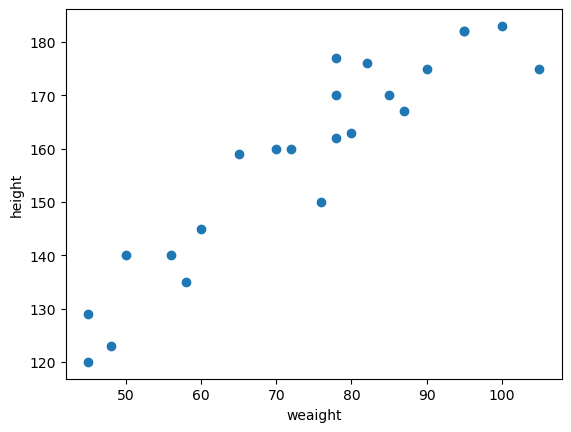

In [5]:
plt.scatter(df['Weight'],df['Height'],)
plt.xlabel('weaight')
plt.ylabel('height')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [9]:
## divvide our dataset into independent and dependent features
X=df[['Weight']] ## idnependent feature
y=df['Height'] ##dependent features

In [10]:
X.shape , y.shape

((23, 1), (23,))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=42)
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [13]:
scaler=StandardScaler()

X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [14]:
X_train=scaler.fit_transform(X_train)

X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [15]:
X_test=scaler.fit_transform(X_test)



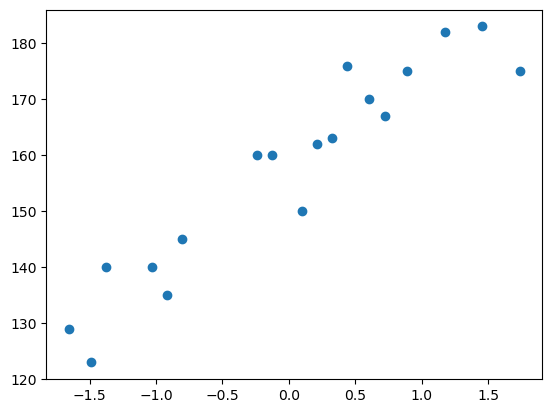

In [16]:
plt.scatter(X_train,y_train)

In [17]:
lr=LinearRegression()


In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.predict(X_test)

array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
       150.11426154])

In [20]:
lr.intercept_


157.5

In [21]:
lr.coef_

array([17.03440872])

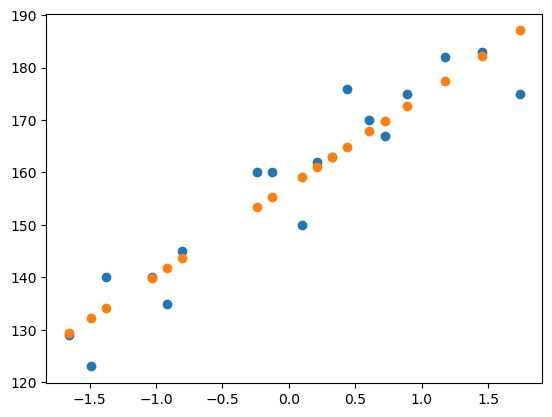

In [22]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,lr.predict(X_train),)

In [23]:
## Prediction for test data
y_pred_test=lr.predict(X_test)

In [24]:
y_pred_test

array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
       150.11426154])

In [25]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
       150.11426154])

In [27]:
mean_squared_error(y_test, y_pred_test)

79.76809057832979

In [28]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

79.76809057832979
7.9393285483063725
8.931298370244372


In [29]:
from sklearn.metrics import r2_score

In [30]:
score=r2_score(y_test,y_pred_test)
score

0.8379487839705635

In [31]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7839317119607513

In [32]:
scaler

StandardScaler()

In [33]:
lr

LinearRegression()